In [5]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.kinematic_cuts as kcuts
import my_library.constants as constants
import os
import my_library.gluex_style

In [6]:
ROOT.EnableImplicitMT()
os.nice(18)

19

In [7]:
mc_path_pipkmks = '/work/halld/home/viducic/data/pipkmks/mc/signal/pipkmks_flat_bestX2_2018_spring_loose_chi2.root'
data_path_pipkmks = '/work/halld/home/viducic/data/pipkmks/data/bestX2/pipkmks_flat_bestX2_2018_spring_loose_chi2.root'

tree_data_pipkmks = 'pipkmks__B4_M16'
tree_mc_pipkmks = 'pipkmks__ks_pippim__B4_M16'

df_data_pipkmks = ROOT.RDataFrame(tree_data_pipkmks, data_path_pipkmks)
df_mc_pipkmks = ROOT.RDataFrame(tree_mc_pipkmks, mc_path_pipkmks)

In [8]:
df_data_pipkmks = tools.define_pipkmks_columns(df_data_pipkmks)
df_data_pipkmks = df_data_pipkmks.Filter(kcuts.MX2_PPIPKMKS_CUT).Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.P_P_CUT).Filter('pipkmks_m < 1.5').Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)

df_mc_pipkmks = tools.define_pipkmks_columns(df_mc_pipkmks)
df_mc_pipkmks = df_mc_pipkmks.Filter(kcuts.MX2_PPIPKMKS_CUT).Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Filter(kcuts.KMP_MASS_CUT).Filter(kcuts.KSP_MASS_CUT).Filter(kcuts.P_P_CUT).Filter('pipkmks_m < 1.5').Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)

In [9]:
# hist_chi2_data_pipkmks = df_data_pipkmks.Histo1D(('chi2', 'chi2', 100, 0, 10), 'chi2ndf')
# hist_chi2_mc_pipkmks = df_mc_pipkmks.Histo1D(('chi2', 'chi2', 100, 0, 10), 'chi2ndf')

# hist_chi2_data_pipkmks_cut = df_data_pipkmks.Filter('chi2ndf < 5').Histo1D(('chi2_cut', 'chi2', 100, 0, 10), 'chi2ndf')

hist_kfcl_data_pipkmks = df_data_pipkmks.Histo1D(('kfcl', 'kfcl', 10000, 0, 1), 'kinfit_cl')
hist_kfcl_mc_pipkmks = df_mc_pipkmks.Histo1D(('kfcl', 'kfcl', 10000, 0, 1), 'kinfit_cl')

hist_kfcl_data_pipkmks_cut = df_data_pipkmks.Filter('chi2ndf < 5').Filter('kinfit_cl > 1e-5').Histo1D(('kfcl_cut', 'kfcl', 10000, 0, 1), 'kinfit_cl')


In [10]:
c = ROOT.TCanvas('c', 'c', 800, 600)

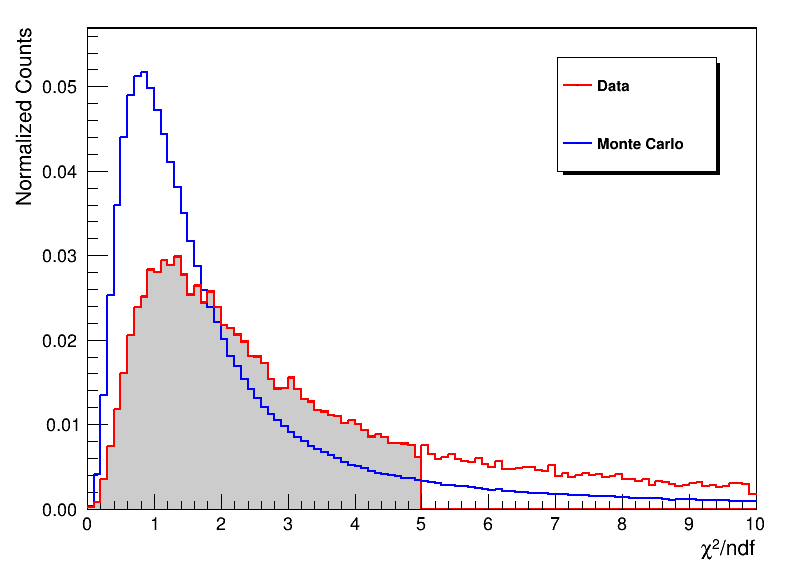

In [21]:
# c.Clear()
# # c.SetLogx(0)

# hist_chi2_data_pipkmks.Scale(1/hist_chi2_data_pipkmks.Integral())
# hist_chi2_mc_pipkmks.Scale(1/hist_chi2_mc_pipkmks.Integral())
# hist_chi2_data_pipkmks_cut.Scale(1/hist_chi2_data_pipkmks_cut.Integral()* 0.79)

# hist_chi2_data_pipkmks.SetLineColor(ROOT.kRed)
# hist_chi2_data_pipkmks_cut.SetLineColor(ROOT.kRed)
# hist_chi2_data_pipkmks_cut.SetFillColor(ROOT.kGray)
# hist_chi2_data_pipkmks.SetFillColor(0)
# hist_chi2_mc_pipkmks.SetLineColor(ROOT.kBlue)
# hist_chi2_mc_pipkmks.SetFillColor(0)

# hist_chi2_data_pipkmks_cut.GetXaxis().SetTitle('#chi^{2}/ndf')
# hist_chi2_data_pipkmks_cut.GetYaxis().SetRangeUser(0, hist_chi2_mc_pipkmks.GetMaximum()*1.1)
# hist_chi2_data_pipkmks_cut.GetYaxis().SetTitle('Normalized Counts')

# hist_chi2_data_pipkmks_cut.Draw('hist')
# hist_chi2_mc_pipkmks.Draw('hist same')
# hist_chi2_data_pipkmks.Draw('hist same')

# legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
# legend.AddEntry(hist_chi2_data_pipkmks.GetPtr(), 'Data', 'lpf')
# legend.AddEntry(hist_chi2_mc_pipkmks.GetPtr(), 'Monte Carlo', 'lpf')
# legend.Draw()

# c.Draw()

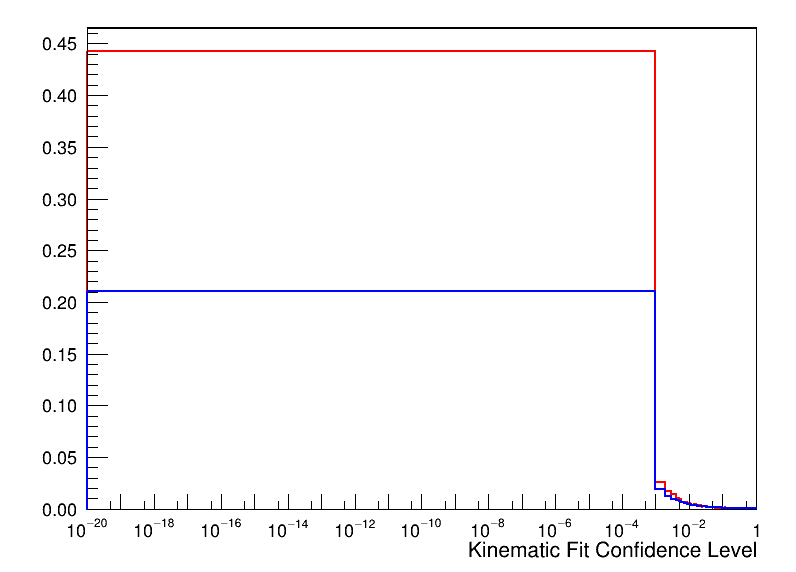

In [22]:
c.Clear()

# plot cl histograms 
hist_kfcl_data_pipkmks.Scale(1/hist_kfcl_data_pipkmks.Integral())
hist_kfcl_mc_pipkmks.Scale(1/hist_kfcl_mc_pipkmks.Integral())

hist_kfcl_data_pipkmks.SetLineColor(ROOT.kRed)
hist_kfcl_data_pipkmks.SetFillColor(0)
hist_kfcl_mc_pipkmks.SetLineColor(ROOT.kBlue)
hist_kfcl_mc_pipkmks.SetFillColor(0)

hist_kfcl_mc_pipkmks.GetXaxis().SetTitle('Kinematic Fit Confidence Level')
hist_kfcl_data_pipkmks.GetXaxis().SetTitle('Kinematic Fit Confidence Level')


hist_kfcl_data_pipkmks.Draw('hist')
hist_kfcl_mc_pipkmks.Draw('hist same')

c.SetLogx()
c.Draw()
